# Introduction to Probability
## Statistics for Data Science
---

## What does probability describe?

* trial 
    * a single occurance whose value is unknown until observed
* outcome, $H$
    * a possible trial result
* outcome space, $\Omega = \{H, T, \dots\}$
    * the set of all possible results
* event, $E$ 
    * a combination of outcomes of interest
    * a subset of the outcome space    

* probability, $P(E|\Omega) = P(E)$
    * a value between 0 and 1 inclusive
    * a guide to the result of the trial
    * ...other definitions later...

## What does probability represent?

* classical
    * probability: 
        * the number of:  relevant cases / all equiprobable cases
    * maxim:
        * "probability is a ratio of what we want to what could be"
    * use when:
        * equiprobable outcome space is known

* frequentist
    * probability:
        * the long-run frequency of an event
    * maxim:
        * "probability is a rate (set by nature)"
    * use when:
        * data for many trials available
        * point comparisons of distributions

* bayesian
    * probability:
        * how uncertain an event is
    * maxim:
        * "all probability is conditional (on what you know)"
    * use when:
        * full distributions available / simulated
    

## What is the framework of classical probability?


* outcome, an equiprobable trial result $H$
* outcome space, $\Omega = \{H, T, \dots\}$
    * a set of *equiprobable* possible outcomes
* event, $E$ 
    * a combination of outcomes of interest
    * a subset of the outcome space
* probability, $P(E|\Omega) = P(E)$
    * a value between 0 and 1 inclusive
    * a *ratio* of relevant outcomes to all possible


## What is an outcome space?

* e.g. dice

In [1]:
die_outcomes =  {1, 2, 3, 4, 5, 6}


## What is an event?

* odd
* low

In [2]:
die_event_odd = {1, 3, 5}
die_event_low = {1, 2}


## How is probability computed classically?

Classical probability is just a ratio of set cardinalities, ie., the number of "favourable events" over the number of all possible...

In [3]:
len(die_event_odd) / len(die_outcomes)


0.5

Classical probability ignores impossible events, eg., suppose we include `9` (outside a 1-6 die)...

In [4]:
impossible = {1, 3, 5, 9}
len(impossible) / len(die_outcomes)


0.6666666666666666

To eliminate the impossible, we just take the intersection with the outcome space...

In [5]:
impossible = {1, 3, 5, 9}
len(impossible & die_outcomes) / len(die_outcomes)


0.5

Generalizing this formula,

In [6]:
from fractions import Fraction as F; F.__repr__ = F.__str__

def pr(event_set, outcome_set):
    return F(len(event_set & outcome_set)) / len(outcome_set)


pr(die_event_odd, die_outcomes), pr(die_event_low, die_outcomes)


(1/2, 1/3)

Probability is often expressed with an implied relation to the outcome space, ie., $P(E)$ just means $P(E|\Omega)$.

So in python, we fix the outcome space:

In [7]:
def P_die(event):
    return pr(event, die_outcomes)


In [8]:
P_die({1})


1/6

## How are events combined?

The mathematical framework of probability is set theory,

In [9]:
from matplotlib_venn import venn3, venn2

def plot_set(*sets): 
    return venn2(sets) if len(sets) == 2 else venn3(sets)


The probability of a co-occurance of events is an intersection,

In [10]:
P_die(die_event_odd & die_event_low)


1/6

The probability of *either*, a union,

In [11]:
P_die(die_event_odd | die_event_low)


2/3

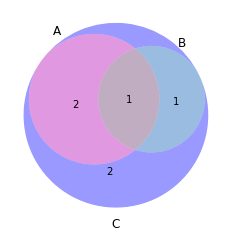

In [12]:
plot_set(die_event_odd, die_event_low, die_outcomes);


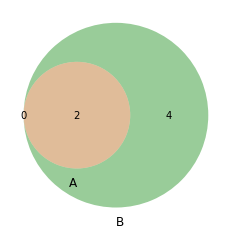

In [13]:
plot_set(die_event_low, die_outcomes);


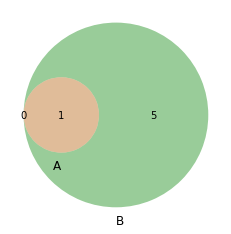

In [14]:
plot_set(die_event_low & die_event_odd, die_outcomes);


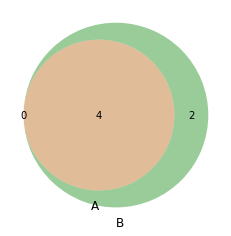

In [15]:
plot_set(die_event_low | die_event_odd, die_outcomes);


## How are conditional events expressed?

Rolling a `1` then `5` is an independent event. *That* I have rolled `1` has no effect on whether I will then role a `5`:  $P(1|5)$ is the same as $P(1)$, (and $P(1|4)$, etc.). 

However consinder, $P(Rain_{Tomorrow})$, $P(Rain_{Tomorrow}|Rain_{Today})$, $P(Rain_{Tomorrow}|Sun_{Tomorrow})$, etc.

The condition *that* it is raining today *increases* the probability that it rains tomorrow; and so given this condition, we adjust our probabilities. 



## How do set operations correspond to probability arithmetic?

The probability of *both* (A and B) is a multiplication, 

$P(A \& B) = P(A) P(B|A)$

In [16]:
 P_die(die_event_odd &  die_event_low) == P_die(die_event_odd) * P_die(die_event_low) 
    

True

note in this case $P(B) = P(B|A)$ as whether we have rolled an odd number has no effect on whether we will also roll a low number. 

The probability of (A or B) is an addition,

$P(A \| B) = P(A) + P(B) - P(A \& B) = P(A) + P(B) - P(A) P(B|A)$

In [17]:
P_die(die_event_odd | die_event_low) == \
P_die(die_event_odd) + P_die(die_event_low) - ( P_die(die_event_odd) * P_die(die_event_low))


True

The 'OR' rule is more complex than the 'AND', the subtract is to remove the effect of double-counting events:

In [18]:
die_event_odd, die_event_low


({1, 3, 5}, {1, 2})

Here note without that substract the event `1` would be counted twice. 

## What are permutations and combinations?

In [19]:
from itertools import combinations, permutations


A permutation of a set, $A$, is a set $B$, of tuples, which contains all possible orderings of the members of $A$.

In [20]:
set(permutations({'R', 'B', 'G'}))


{('B', 'G', 'R'),
 ('B', 'R', 'G'),
 ('G', 'B', 'R'),
 ('G', 'R', 'B'),
 ('R', 'B', 'G'),
 ('R', 'G', 'B')}

...a permutation may have an $r$-length, to filter orderings to sequences of $r$ in length,

In [21]:
set(permutations({'R', 'B', 'G'}, 2))


{('B', 'G'), ('B', 'R'), ('G', 'B'), ('G', 'R'), ('R', 'B'), ('R', 'G')}

The combinations of a set $A$, is a set $B$ of with unique subsets of $A$, of size $r$, 

In [22]:
set(combinations({'R', 'G', 'B'}, 2))


{('B', 'G'), ('B', 'R'), ('R', 'G')}

## How do combinations (, permutations) define outcome spaces?

Permutations and combinations are helpful in defining events and outcome spaces,

In [23]:
suit = '♥♠♦♣'
rank = 'AKQJT98765432'

deck  = {r + s for r in rank for s in suit}
hands = set(combinations(deck, 5))

len(deck), len(hands)


(52, 2598960)

...here `combinations` produces all five-card subsets of the `deck` outcome space. 

In [24]:
from random import sample
players = set(sample(hands, 3));
players


{('4♥', '9♥', '6♠', '2♥', 'K♥'),
 ('T♣', '9♣', 'T♦', 'K♣', 'K♠'),
 ('T♥', '9♠', '6♠', '2♥', 'Q♥')}

We can define the probability of an `event` on the `hands` outcome space,

In [25]:
def P_cards(event):
    return pr(event, hands)


In [26]:
P_cards(players)


1/866320

## How do you parse complex events?

Set comprehensions over tuples are very useful,

```python

{ u for (u, v) in event }

```



In [27]:
def ranks(hand):
    return {rank for (rank, suit) in hand}

def suits(hand):
    return {suit for (rank, suit) in hand}


In [28]:
ranks(list(players)[0]), suits(list(players)[0])


({'2', '6', '9', 'Q', 'T'}, {'♠', '♥'})

## How do you derive events from outcome spaces?

Mathematicians use set-builder notation in place of set comprehensions.

In builder notation, `e : s` seperates an expression `e` which defines each element of the resulting set; and `s` which is the *source* of those elements.

The source is usually given as $e \in E$, ie., that the elements are from some set $E$; along with filter conditions given by `,` which can be read as 'AND'. 

$$\text{Flush } = \{ o : o \in \Omega, S(o, 1)\}$$


$$\text{Flush } = \{ o : o \in \Omega, S(o, 1)\}$$
$$\text{Couple } = \{ o : o \in \Omega, R(o, 2)\}$$

$R(o, n) = \#\{r : r \in Ranks(o)\} == n$

$S(o, n) = \#\{r : r \in Suits(o)\} == n$


In [29]:
def S(hand, n):
    return len(suits(hand)) == n 

def R(hand, n):
    return len(ranks(hand)) == n


In [30]:
event_flush = {h for h in hands if S(h, 1)}
event_couple = {h for h in hands if R(h, 2)}


In [31]:
P_cards(event_flush)


33/16660

In [32]:
f"1 in { 1.0/P_cards(event_flush)  : .0f}"


'1 in  505'

In [33]:
f"1 in { 1.0/P_cards(event_couple)  : .0f}"


'1 in  595'

In [34]:
f"1 in { 1.0/P_cards(event_couple | event_flush)  : .0f}"


'1 in  273'

## Appendix
### Module Set Up

    !pip install -q matplotlib_venn